# [Task2 Dataset Analysis]
The title of the notebook should be coherent with file name. Namely, file name should be:    
*author's initials_progressive number_title.ipynb*    
For example:    
*EF_01_Data Exploration.ipynb*

## Purpose
State the purpose of the notebook.

## Methodology
Quickly describe assumptions and processing steps.

## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- todo 1;
- todo 2;
- todo 3.

## Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

# Setup

## Library import
We import all the required Python libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os,sys
import joblib
from os import path

# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Common things
# from sklearn.metrics import classification_report
# from scipy import stats

# Visualizations
# import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("white") # darkgrid, whitegrid, dark, white, and ticks
# plt.figure(figsize=(7, 7))

# Autoreload extension
# if 'autoreload' not in get_ipython().extension_manager.loaded:
#     %load_ext autoreload
    
# %autoreload 2

In [3]:
# Examples seaborn
# with sns.axes_style("whitegrid"):
#     fig, axis = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
#     fig.suptitle(f'Position distribution on splits')
#     sns.boxplot(ax=axis[0], data=df_prep, y='event', x='ith_pos', order=event_label_map.values())
#     sns.boxplot(ax=axis[1], data=pd.read_pickle(path.join(DATA_PATH, "stage2_test.pkl") ), y='event', x='ith_pos', order=event_label_map.values())

## Local library import
We import all the required local libraries libraries

In [4]:
# Include local library paths
import sys
# sys.path.append('path/to/local/lib') # uncomment and fill to import local libraries
# add project folders so local libraries can be imported
sys.path.insert(1, os.path.join(os.getcwd()  , '..'))
sys.path.insert(1, os.path.join(os.getcwd()  , '../src'))

# Import local libraries
# from plibs.utils import corrstats
# from src.plibs.utils import plots as myplots

In [5]:
# notebook misc functions
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def displayAll(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):	
        display(df)  

In [6]:
def read_ds(path, class_field='label'):
    df =None
    if path.endswith('.tsv'):
        df = pd.read_csv(path, sep='\t')
    elif path.endswith('.csv'):
        df = pd.read_csv(path)
    else:
        df = pd.read_pickle(path)

    print(f"Shape: {df.shape}")
    display(df.head())
    print(df[class_field].value_counts())    

    return df

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

In [7]:
# *** parameters for GUILD tracked projects ****
%env GUILD_HOME=../tracking/.guild
#os.environ['GUILD_HOME']
from guild import ipy
GUILD_HOME = ipy.guild_home()

# RUN_ID = "df2d52de187f4ed0ba5c1f10ed7bfab7" # example
# #RUN_PATH = f"{ipy.guild_home()}/runs"
# RUN_PATH = f"{ipy.guild_home()}/runs/{RUN_ID}"
# os.listdir(RUN_PATH)

def run_path(runid) -> str:
    return f"{ipy.guild_home()}/runs/{runid}"

def run_files(runid):
    return os.listdir(run_path(runid))

env: GUILD_HOME=../tracking/.guild



# Data import
We retrieve all the required data for the analysis.

In [8]:
# df_train = pd.read_csv("../data/input/task2/train.tsv", sep='\t')
# df_val = pd.read_csv("../data/input/task2/validation.tsv", sep='\t')
# print(f"Train: {df_train.shape} Val: {df_val.shape}")
# display(df_train.head())
# print(df_train.Stance.value_counts())
# display(df_val.head())
# print(df_val.Stance.value_counts())

df_train = read_ds("../data/input/task2/train.tsv", class_field='Stance')
df_val = read_ds("../data/input/task2/validation.tsv", class_field='Stance')

Shape: (3556, 5)


,id,Tweet,Claim,Stance,Premise
0,3054935,@realDonaldTrump It's too dangerous to hold th...,school closures,FAVOR,1
1,453444,If masks are so important why is the public no...,face masks,AGAINST,1
2,211600,But if schools close who is gonna occupy those...,school closures,FAVOR,1
3,3049718,@GavinNewsom be the Governor I thought you wer...,stay at home orders,FAVOR,1
4,5039679580998,@BBCNews 1. You are reporting 78% uptake on ma...,face masks,FAVOR,1


FAVOR      1346
NONE       1336
AGAINST     874
Name: Stance, dtype: int64
Shape: (600, 5)


,id,Tweet,Claim,Stance,Premise
0,7212131785749,Ordered a mask that had a cute chain attached ...,face masks,FAVOR,0
1,2367433035,Who is ready for some #baseball? #BaseballisB...,stay at home orders,NONE,0
2,496011,"@Mystere07623203 @va_shiva @Liberty13046 130,0...",face masks,FAVOR,1
3,1490686,When they ask me what I did with my life I wil...,face masks,FAVOR,0
4,1209366,Taylor not putting her album in physical store...,stay at home orders,FAVOR,0


FAVOR      244
NONE       198
AGAINST    158
Name: Stance, dtype: int64


### Relation between **Premise** and **Stance**

In [11]:
df_train.Premise.value_counts()

0    2225
1    1331
Name: Premise, dtype: int64

In [12]:
df_train.Stance.value_counts()

FAVOR      1346
NONE       1336
AGAINST     874
Name: Stance, dtype: int64

In [13]:
df_train.query("Premise==1").Stance.value_counts()

FAVOR      756
AGAINST    517
NONE        58
Name: Stance, dtype: int64

In [14]:
df_train.query("Premise==0").Stance.value_counts()

NONE       1278
FAVOR       590
AGAINST     357
Name: Stance, dtype: int64

In [15]:
df_tmp = pd.read_csv("/home/owlmx/research/comps/SMM4H22/tracking/.guild/runs/2c5bb506d2a24cc0a50e4f33014a5a86/task2_train_predictions.tsv", sep='\t')
print(df_tmp.shape)
df_tmp.head()

(3378, 16)


,Unnamed: 0,id,Tweet,Claim,Stance,Premise,tweet_text,tweet_text_clean,labels,Claim2,groupkey,logits_0,logits_1,logits_2,yhat,yhat_label
0,1168,3523150,@TheRightMelissa SERIOUS QUESTION ~ If you had...,face masks,AGAINST,1,@TheRightMelissa SERIOUS QUESTION ~ If you had...,@USER SERIOUS QUESTION ~ If you had ONLY 7 da...,0,Face masks help to protect us.,AGAINST | face masks,0.363888,0.581634,0.054477,1,Neutral
1,3450,5234053527803,This should be the last #lockdown Come Septem...,stay at home orders,AGAINST,1,This should be the last #lockdown Come Septem...,This should be the last lockdown Come Septembe...,0,Stay at home is a needed measure.,AGAINST | stay at home orders,0.889972,0.099474,0.010553,0,Negative
2,1831,4134668835,@drdavidsamadi California...need I say more? :...,stay at home orders,NONE,0,@drdavidsamadi California...need I say more? :...,@USER California...need I say more? :folded_h...,2,Stay at home is a needed measure.,NONE | stay at home orders,0.789607,0.201381,0.009013,0,Negative
3,2443,1813681,I bet if we went around telling anti-maskers t...,face masks,FAVOR,0,I bet if we went around telling anti-maskers t...,I bet if we went around telling anti-maskers t...,1,Face masks help to protect us.,FAVOR | face masks,0.606613,0.370846,0.022541,0,Negative
4,999,789840,Democrats and the teachers' unions don't care ...,school closures,AGAINST,1,Democrats and the teachers' unions don't care ...,Democrats and the teachers' unions don't care ...,0,Schools need to remain closed.,AGAINST | school closures,0.895765,0.096582,0.007653,0,Negative


In [21]:
print(df_tmp.query("Premise==1 and yhat_label=='Positive'").Stance.value_counts())
print(df_tmp.query("Premise==1 and yhat_label=='Negative'").Stance.value_counts())
print(df_tmp.query("Premise==1 and yhat_label=='Neutral'").Stance.value_counts())
print(df_tmp.query("Premise==1 and Stance=='NONE'").yhat_label.value_counts())

FAVOR      48
AGAINST    18
NONE        5
Name: Stance, dtype: int64
FAVOR      529
AGAINST    379
NONE        37
Name: Stance, dtype: int64
FAVOR      143
AGAINST     92
NONE        14
Name: Stance, dtype: int64
Negative    37
Neutral     14
Positive     5
Name: yhat_label, dtype: int64


<AxesSubplot:xlabel='Stance', ylabel='Count'>

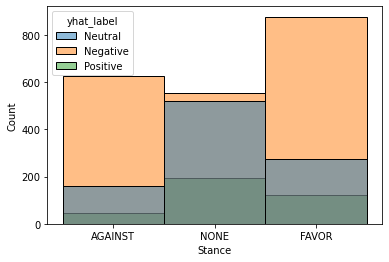

In [28]:
sns.histplot(data=df_tmp, x='Stance', hue='yhat_label')

<AxesSubplot:xlabel='Premise', ylabel='Count'>

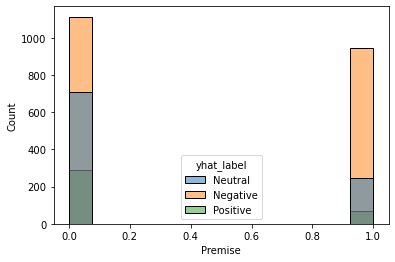

In [31]:
# aparently sentiment can be more correlated to Premise than to Stance. Mainly to Negative sentiment.
sns.histplot(data=df_tmp, x='Premise', hue='yhat_label')

### Processed KGLANDT from Misinfor project


In [23]:
# including MultiNLI
# kg_train = read_ds("/home/owlmx/idsia/misinfocovid/misinfocovid_wp2/tracking/.guild/runs/9ae692ce75d3457aa76f47b5b04e5647/df_stance_preprocessed_train.pkl", class_field='stance')
# Only KGlandt
kg_train = read_ds("/home/owlmx/idsia/misinfocovid/misinfocovid_wp2/tracking/.guild/runs/ac6b616c904242979ed1807cbb27a08f/df_stance_preprocessed_train.pkl", class_field='stance')
kg_val = read_ds("/home/owlmx/idsia/misinfocovid/misinfocovid_wp2/tracking/.guild/runs/ac6b616c904242979ed1807cbb27a08f/df_stance_preprocessed_val.pkl", class_field='stance')
kg_test = read_ds("/home/owlmx/idsia/misinfocovid/misinfocovid_wp2/tracking/.guild/runs/ac6b616c904242979ed1807cbb27a08f/df_stance_preprocessed_test.pkl", class_field='stance')

Shape: (3224, 18)


,tweet_id,target,stance,opinion_towards,sentiment,tweet_text,tweet_favorite_count,user_id,user_name,user_followers_count,retweet_count,verified,opinion,split,successfully_hydrated,statement,tweet_text_clean,tgt_lang
5335,1287819613464440832,stay_at_home_orders,AGAINST,2. The tweet does NOT expresses opinion about ...,neg,@ErinGoKirk @howardr0613 @AshleyRParker @Phili...,1.0,1.2383141420935537e+18,Dogs Rule 🐕 🐶,580.0,0.0,False,2,train,True,Stay at home is a needed measure.,@USER @USER @USER @USER @USER Stoopid people....,True
921,1237886079534911489,school_closures,AGAINST,1. The tweet explicitly expresses opinion abo...,neg,I've been in online college classes. All yall ...,1.0,1.1747348746802872e+18,Yee Yee,86.0,0.0,False,1,train,True,Schools need to remain closed.,I've been in online college classes. All yall ...,True
3304,1290409978319306753,face_masks,FAVOR,2. The tweet does NOT expresses opinion about ...,neg,@JeffPassan @markasaxon Gee it's almost as if ...,0.0,1.0090223557069742e+18,TonyHarrison266,3.0,NaN,NaN,2,train,True,Face masks help to protect us.,@USER @USER Gee it's almost as if the MLB's p...,True
2939,1289881098852249600,face_masks,FAVOR,1. The tweet explicitly expresses opinion abo...,other,@RileyKays @GiroSammy @HeatherBadenoch @nytime...,0.0,97989030.0,SoniaJ,1174.0,NaN,NaN,1,train,True,Face masks help to protect us.,@USER @USER @USER @USER @USER It’s incorrect ...,True
4656,1282256339159457793,face_masks,AGAINST,1. The tweet explicitly expresses opinion abo...,neg,@ClarkeMicah Great article in the DM this mo...,0.0,1.2787899962464256e+18,Darren 💫izzy Winter 👊🏼🇺🇸👊🏼🇮🇱,2576.0,0.0,False,1,val,True,Face masks help to protect us.,@USER Great article in the DM this morning. T...,True


FAVOR      1237
NONE       1224
AGAINST     763
Name: stance, dtype: int64
Shape: (402, 18)


,tweet_id,target,stance,opinion_towards,sentiment,tweet_text,tweet_favorite_count,user_id,user_name,user_followers_count,retweet_count,verified,opinion,split,successfully_hydrated,statement,tweet_text_clean,tgt_lang
5471,1286601462634754054,stay_at_home_orders,NONE,3. The tweet is not explicitly expressing opi...,other,@DebbieSchafer You forgot hashtag #cyrilramaph...,0.0,1.1695504779331215e+18,Rob Hall,138.0,0.0,False,3,train,True,Stay at home is a needed measure.,@USER You forgot hashtag,True
3401,1289421067929268224,face_masks,AGAINST,1. The tweet explicitly expresses opinion abo...,neg,"Next time someone tells you to wear a mask, ju...",1.0,1.2834732565829714e+18,ImNotPartofThis,48.0,NaN,NaN,1,train,True,Face masks help to protect us.,"Next time someone tells you to wear a mask, ju...",True
1598,1278011093613502464,fauci,FAVOR,2. The tweet does NOT expresses opinion about ...,neg,Rand Paul is not fact based! If he were in Lon...,1.0,23336986.0,Liz #BlackLivesMatter,126.0,0.0,False,2,train,True,Fauci is doing a good job.,Rand Paul is not fact based! If he were in Lon...,True
5823,1277286768409272320,stay_at_home_orders,NONE,2. The tweet does NOT expresses opinion about ...,other,Today is my.. not doing anything day. Catch up...,4.0,39671081.0,JustHereForTheHockey,1940.0,0.0,False,2,train,True,Stay at home is a needed measure.,Today is my.. not doing anything day. Catch up...,True
6025,1281054330989228034,stay_at_home_orders,NONE,2. The tweet does NOT expresses opinion about ...,neg,Feeling a twinge of regret for my exodus from ...,2.0,19167743.0,Virginia Sowers,68.0,0.0,False,2,val,True,Stay at home is a needed measure.,Feeling a twinge of regret for my exodus from ...,True


FAVOR      154
NONE       153
AGAINST     95
Name: stance, dtype: int64
Shape: (402, 18)


,tweet_id,target,stance,opinion_towards,sentiment,tweet_text,tweet_favorite_count,user_id,user_name,user_followers_count,retweet_count,verified,opinion,split,successfully_hydrated,statement,tweet_text_clean,tgt_lang
2180,1278307354409414656,fauci,AGAINST,1. The tweet explicitly expresses opinion abo...,neg,@GMan40401036 @e_iaco Calm down with your hate...,0.0,1.2628416378074563e+18,Jerry MacDavid,4.0,0.0,False,1,train,True,Fauci is doing a good job.,@USER @USER Calm down with your hate. Instead...,True
294,1283862106102796288,school_closures,FAVOR,1. The tweet explicitly expresses opinion abo...,neg,@RiegerReport Do you want to trust the people ...,1.0,9.298528254122926e+17,annie,6741.0,1.0,False,1,test,True,Schools need to remain closed.,@USER Do you want to trust the people who cag...,True
1020,1237529010164224005,school_closures,NONE,2. The tweet does NOT expresses opinion about ...,neg,You know you live in the United States when th...,0.0,25470007.0,Ali I. 💉,591.0,1.0,False,2,train,True,Schools need to remain closed.,You know you live in the United States when th...,True
1641,1260256870939406342,fauci,FAVOR,1. The tweet explicitly expresses opinion abo...,other,"@cspan But, #DrFauci is a leader on the #coron...",0.0,799426280.0,Suzanne W- Get your mammogram-get vaccinated,1821.0,0.0,False,1,train,True,Fauci is doing a good job.,"@USER But, is a leader on the task force. @US...",True
5,1253095262991630336,fauci,FAVOR,2. The tweet does NOT expresses opinion about ...,neg,@MSNBC there needs to be a new broadcast rule ...,0.0,245612661.0,Mike Carrier,98.0,0.0,False,2,test,True,Fauci is doing a good job.,@USER there needs to be a new broadcast rule ...,True


FAVOR      155
NONE       152
AGAINST     95
Name: stance, dtype: int64


In [24]:
kg_train.target.value_counts()

fauci                  909
face_masks             866
stay_at_home_orders    781
school_closures        668
Name: target, dtype: int64

In [21]:
kg_train.genre.value_counts()

telephone     16640
government    15462
slate         15445
Name: genre, dtype: int64

### Samples

In [30]:
# query("Claim == 'face masks'").
displayAll(df_train.groupby(by=['Claim', 'Stance']).sample(2))

,id,Tweet,Claim,Stance,Premise
3469,622897,@spiritualwitch2 @Ellie203B @GovMurphy @FirstLadyNJ How old are you?? Violence over a #useless #mask?? Grow up. #karma sure is a bitch! #MasksOffAmerica #BurnYourMask,face masks,AGAINST,0
1838,1686672,@BeysBaeee @AlanMcleanCdn @thebobert @CP24 Dude you realise I can post thousands of articles anti mask right?,face masks,AGAINST,0
2454,3352539,"@wsvn It’s not the masks stop protesting &amp; having home parties, hotel parties, boat parties etc you see them posting all the parties through Social Media.",face masks,FAVOR,0
1179,1404227,@JohnCornyn Trying to be a smart ass!!! Dr Fauci is the only expert we need!!! #TrumpDeathToll137K #TrumpVirusCatastrophe #TrumpGolfsAmericansDie,face masks,FAVOR,0
2577,569568705,"@hububaloo @KATUNews Might’ve originated in China, but it’s not their fault that this country full of white people aren’t handling it all that well. :woman_facepalming_light_skin_tone:",face masks,NONE,0
884,2178273112,"@Full_On_Cynic I am a multitasker. I will be voting Green to help them reach 5%, but I am 100% ready to put my vest and gas mask on, just been busy working nonstop as a nurse since Covid hit. Ugh.",face masks,NONE,0
3130,313861,Studies have shown that the chances of children contracting COVID-19 are next to nil . Stop throwing shade for your corrupt teachers unions .,school closures,AGAINST,1
1959,3057155,"I don’t understand why #teachers are so reluctant to go back to #school. Many of us have been working safely, coming in contact with numerous people without problems, since the beginning of the pandemic. It’s time to get dressed and go back to work! #COVID19",school closures,AGAINST,0
607,1522438,Homeschooling is the best way ever!,school closures,FAVOR,1
2483,3508542,Schools in Scotland and Wales are shutting as of Friday. While in England the schools are still open. We need to keep all our children safe from this deadly Coronavirus. England will be the only nation in Europe to keep schools open. #covid19UK #coronavirus,school closures,FAVOR,1


# Data processing
Put here the core of the notebook. Feel free to further split this section into subsections.

In [11]:
df_prepared_train = read_ds(path.join(run_path("e63d44cad9bd43bd987b3e3e6ff7c889"), "prepared/task2_train.tsv"), class_field='Stance')
df_prepared_val = read_ds(path.join(run_path("e63d44cad9bd43bd987b3e3e6ff7c889"), "prepared/task2_val.tsv"), class_field='Stance')
df_prepared_test = read_ds(path.join(run_path("e63d44cad9bd43bd987b3e3e6ff7c889"), "prepared/task2_test.tsv"), class_field='Stance')

Shape: (3378, 11)


,Unnamed: 0,id,Tweet,Claim,Stance,Premise,tweet_text,tweet_text_clean,labels,Claim2,groupkey
0,1168,3523150,@TheRightMelissa SERIOUS QUESTION ~ If you had...,face masks,AGAINST,1,@TheRightMelissa SERIOUS QUESTION ~ If you had...,@USER SERIOUS QUESTION ~ If you had ONLY 7 da...,0,Face masks help to protect us.,AGAINST | face masks
1,3450,5234053527803,This should be the last #lockdown Come Septem...,stay at home orders,AGAINST,1,This should be the last #lockdown Come Septem...,This should be the last lockdown Come Septembe...,0,Stay at home is a needed measure.,AGAINST | stay at home orders
2,1831,4134668835,@drdavidsamadi California...need I say more? :...,stay at home orders,NONE,0,@drdavidsamadi California...need I say more? :...,@USER California...need I say more? :folded_h...,2,Stay at home is a needed measure.,NONE | stay at home orders
3,2443,1813681,I bet if we went around telling anti-maskers t...,face masks,FAVOR,0,I bet if we went around telling anti-maskers t...,I bet if we went around telling anti-maskers t...,1,Face masks help to protect us.,FAVOR | face masks
4,999,789840,Democrats and the teachers' unions don't care ...,school closures,AGAINST,1,Democrats and the teachers' unions don't care ...,Democrats and the teachers' unions don't care ...,0,Schools need to remain closed.,AGAINST | school closures


FAVOR      1278
NONE       1270
AGAINST     830
Name: Stance, dtype: int64
Shape: (253, 11)


,Unnamed: 0,id,Tweet,Claim,Stance,Premise,tweet_text,tweet_text_clean,labels,Claim2,groupkey
0,103,1984764,@NeelaJan @GregHuntMP There’s so many good rea...,face masks,FAVOR,0,@NeelaJan @GregHuntMP There’s so many good rea...,@USER @USER There’s so many good reasons to s...,1,Face masks help to protect us.,FAVOR | face masks
1,384,2057659517,@Brixton_Ben26 I will try to find the stats ag...,face masks,AGAINST,1,@Brixton_Ben26 I will try to find the stats ag...,@USER I will try to find the stats again but ...,0,Face masks help to protect us.,AGAINST | face masks
2,374,1502631,"If Harvard is still doing distant learning, th...",school closures,FAVOR,0,"If Harvard is still doing distant learning, th...","If Harvard is still doing distant learning, th...",1,Schools need to remain closed.,FAVOR | school closures
3,294,1289788990,:notes::arrow_forward:Show &amp; tell @burnabo...,stay at home orders,NONE,0,:notes::arrow_forward:Show &amp; tell @burnabo...,:notes::arrow_forward:Show and tell @USER @USE...,2,Stay at home is a needed measure.,NONE | stay at home orders
4,464,3005765265,@migga When I heard 2pm.. I sighed. 200 is st...,stay at home orders,NONE,0,@migga When I heard 2pm.. I sighed. 200 is st...,@USER When I heard 2pm.. I sighed. 200 is sti...,2,Stay at home is a needed measure.,NONE | stay at home orders


FAVOR      98
NONE       92
AGAINST    63
Name: Stance, dtype: int64
Shape: (525, 11)


,Unnamed: 0,id,Tweet,Claim,Stance,Premise,tweet_text,tweet_text_clean,labels,Claim2,groupkey
0,540,790606768,.@DallasISDMedia NO IN PERSON SCHOOL @ least t...,school closures,NONE,0,.@DallasISDMedia NO IN PERSON SCHOOL @ least t...,. @USER NO IN PERSON SCHOOL @ least through La...,2,Schools need to remain closed.,NONE | school closures
1,444,1535035885,:notes::arrow_forward:Firework @katyperry On ...,stay at home orders,NONE,0,:notes::arrow_forward:Firework @katyperry On ...,:notes::arrow_forward:Firework @USER On Totori...,2,Stay at home is a needed measure.,NONE | stay at home orders
2,598,659269,@TheLalasventure @doqholliday @realDonaldTrump...,face masks,FAVOR,0,@TheLalasventure @doqholliday @realDonaldTrump...,@USER @USER @USER Houston really does have a ...,1,Face masks help to protect us.,FAVOR | face masks
3,451,230078,@lc5190 Ever noticed how masks-wearers are con...,face masks,AGAINST,0,@lc5190 Ever noticed how masks-wearers are con...,@USER Ever noticed how masks-wearers are cont...,0,Face masks help to protect us.,AGAINST | face masks
4,246,141134,When you have people listening to you (as dumb...,stay at home orders,FAVOR,0,When you have people listening to you (as dumb...,When you have people listening to you (as dumb...,1,Stay at home is a needed measure.,FAVOR | stay at home orders


FAVOR      214
NONE       172
AGAINST    139
Name: Stance, dtype: int64


In [30]:
print(df_prepared_train.tweet_text_clean.map(lambda x: len(x.split(' '))).describe())
print(df_prepared_test.tweet_text_clean.map(lambda x: len(x.split(' '))).describe())

count    3378.000000
mean       27.722321
std        13.684584
min         1.000000
25%        15.000000
50%        27.000000
75%        39.000000
max        95.000000
Name: tweet_text_clean, dtype: float64
count    525.000000
mean      27.573333
std       13.950870
min        3.000000
25%       15.000000
50%       27.000000
75%       40.000000
max       96.000000
Name: tweet_text_clean, dtype: float64


In [16]:
df_prepared_train['words'] = df_prepared_train.tweet_text_clean.map(lambda x: len(x.split(' ')))

In [19]:
displayAll(df_prepared_train.query("words < 5"))

,Unnamed: 0,id,Tweet,Claim,Stance,Premise,tweet_text,tweet_text_clean,labels,Claim2,groupkey,words
82,2567,1433222,Save schools,school closures,AGAINST,0,Save schools,Save schools,0,Schools need to remain closed.,AGAINST | school closures,2
118,910,4266034740,I support teachers #Covid_19,school closures,NONE,0,I support teachers #Covid_19,I support teachers Covid_19,2,Schools need to remain closed.,NONE | school closures,4
237,1515,6075748056,@Reuters Covid idiots,face masks,NONE,0,@Reuters Covid idiots,@USER Covid idiots,2,Face masks help to protect us.,NONE | face masks,4
506,2200,2541672563,@NicolaSturgeon Scaremongering. Much.,stay at home orders,NONE,0,@NicolaSturgeon Scaremongering. Much.,@USER Scaremongering. Much.,2,Stay at home is a needed measure.,NONE | stay at home orders,4
558,3147,2370288179,@econet_support Thank you,stay at home orders,NONE,0,@econet_support Thank you,@USER Thank you,2,Stay at home is a needed measure.,NONE | stay at home orders,4
732,3197,2409260,#lockdown kills people !,stay at home orders,AGAINST,0,#lockdown kills people !,lockdown kills people !,0,Stay at home is a needed measure.,AGAINST | stay at home orders,4
1018,2706,3601830,Please reopen the schools,school closures,AGAINST,0,Please reopen the schools,Please reopen the schools,0,Schools need to remain closed.,AGAINST | school closures,4
1852,2009,1816343,Wear.A.Damn.Mask.,face masks,FAVOR,0,Wear.A.Damn.Mask.,Wear.A.Damn.Mask.,1,Face masks help to protect us.,FAVOR | face masks,1
2060,484,898632736,@DoroLef Absolutely!,face masks,NONE,0,@DoroLef Absolutely!,@USER Absolutely!,2,Face masks help to protect us.,NONE | face masks,3
2165,441,4569488614,@UncleRobTrump Then Uncle,stay at home orders,NONE,0,@UncleRobTrump Then Uncle,@USER Then Uncle,2,Stay at home is a needed measure.,NONE | stay at home orders,4


<AxesSubplot:xlabel='words', ylabel='Count'>

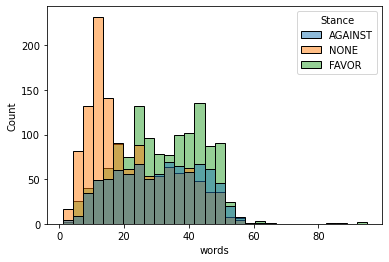

In [22]:
sns.histplot(data=df_prepared_train, x="words", hue='Stance')

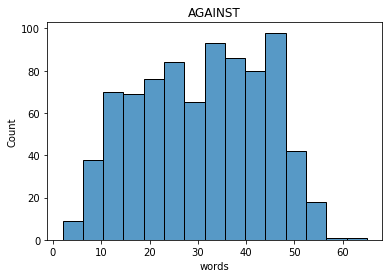

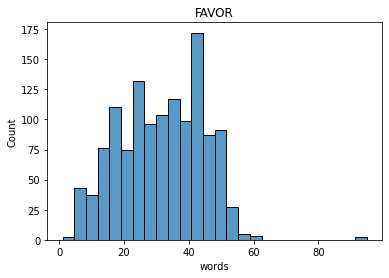

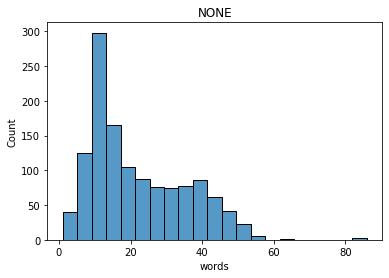

In [29]:
for stance in ['AGAINST', 'FAVOR', 'NONE']:
    plt.figure()
    ax = sns.histplot(data=df_prepared_train.query(f"Stance == '{stance}'"), x="words")
    ax.set_title(stance)
    

## COVIDLIES

In [54]:
# df = read_ds("/home/owlmx/idsia/misinfocovid/misinfocovid_wp2/tracking/.guild/runs/f9c497ed0add4aae85e9aaa48ddbdcf0/misconception-tweet_isrelated_processed.pkl")
# df = read_ds("/home/owlmx/research/comps/SMM4H22/data/input/task2/covidlies/covid_lies.val.tokenized.urldomain.tsv")
df_train = read_ds(path.join(run_path("7abbe21a34b14b7d9e4939128a374892"), "prepared/covidlies_train.tsv"))
df_val = read_ds(path.join(run_path("7abbe21a34b14b7d9e4939128a374892"), "prepared/covidlies_valid.tsv"))

Shape: (2930, 11)


,Unnamed: 0,misconception_id,misconception,tweet_id,label,Tweet,tweet_text,tweet_text_clean,tgt_lang,labels,groupkey
0,2724,10,Coronavirus is caused by 5G.,1233926191649656832,na,First Coronavirus-Related Death in U.S. Confir...,First Coronavirus-Related Death in U.S. Confir...,First Coronavirus-Related Death in U.S. Confir...,True,2,na
1,3222,18,Essential oils cure coronavirus.,1233981037040095232,na,Elmy es the best🥰,Elmy es the best🥰,Elmy es the best:smiling_face_with_hearts:,True,2,na
2,1893,15,Coronavirus can only survive in cold temperatu...,1233916543492222976,na,Corona Virus Map with Timeline of confirmed ca...,Corona Virus Map with Timeline of confirmed ca...,Corona Virus Map with Timeline of confirmed ca...,True,2,na
3,2328,10,Coronavirus is caused by 5G.,1233908556258332672,na,Coronavirus causes ‘upheaval and uncertainty’ ...,Coronavirus causes ‘upheaval and uncertainty’ ...,Coronavirus causes ‘upheaval and uncertainty’ ...,True,2,na
4,545,21,Fennel tea cures coronavirus.,1233983315343888384,na,@GhelotHarish @YogVedantSamiti How to prevent ...,@GhelotHarish @YogVedantSamiti How to prevent ...,@USER @USER How to prevent corona virus??? Us...,True,2,na


na     2750
pos     104
neg      76
Name: label, dtype: int64
Shape: (326, 11)


,Unnamed: 0,misconception_id,misconception,tweet_id,label,Tweet,tweet_text,tweet_text_clean,tgt_lang,labels,groupkey
0,408,52,Chloroquine is a Food and Drug Administration ...,1233954181347729408,na,Scientists and drug companies are racing to de...,Scientists and drug companies are racing to de...,Scientists and drug companies are racing to de...,True,2,na
1,623,46,Kenneth Copeland on Victory Channel can cure C...,1233952793079103488,na,@TeamTrump @robert425 @realDonaldTrump The new...,@TeamTrump @robert425 @realDonaldTrump The new...,@USER @USER @USER The new cases are coming th...,True,2,na
2,1465,37,Jamaat cannot become a source of infection.,1233981896528281600,na,"""These beliefs can keep infected people away f...","""These beliefs can keep infected people away f...","""These beliefs can keep infected people away f...",True,2,na
3,5450,39,Salt water protects from coronavirus.,1233911296673927168,na,Orthodox Metropolis of Korea: Instructions for...,Orthodox Metropolis of Korea: Instructions for...,Orthodox Metropolis of Korea: Instructions for...,True,2,na
4,6399,50,It is safe for individuals infected with COVID...,1233926853511045120,na,@WhiteHouse @CDCgov Why is this secret?. Vito...,@WhiteHouse @CDCgov Why is this secret?. Vito...,@USER @USER Why is this secret?. Vito Lacovie...,True,2,na


na     306
pos     12
neg      8
Name: label, dtype: int64


In [ ]:
## Relation between 

# References
We report here relevant references:
1. author1, article1, journal1, year1, url1
2. author2, article2, journal2, year2, url2